# Election Season 2016

This is a step by step example of what a project for the Data Bootcamp course should consist of.

# Rough Project Idea

I'm interested in data on TV advertising. When I looked in the old MBA Projects repository, I found an example of some data that described how much time different companies advertised by station. I'd be interested in figuring out what other questions could be asked from that dataset.

# Project Idea

Politics is an integral part of the American lifestyle. Federal elections consume the country's attention for over a year leading up to elections. I came across a dataset which has data on all political ads shown in 10 battleground states, including: Arizona, Colorado, Iowa, Nevada, New Hampshire, North Carolina, Florida, Ohio, Pennsylvania and Wisconsin. I am interested in how the number of hours of advertising differs by type of campaign -- For example, one might wonder whether Presidential ads or Senate ads take up more time in each state. Since the election has already happened, one might also be able to investigate how advertising time related to the outcome.

# Project Proposal

# Data Report

Our data can be found on "Political TV Ad Archive" at this [link](http://politicaladarchive.org). They have an API which can be used to download the data. By clicking around and seeing what the links were pointing to when I clicked them, I discovered that the format for downloading data is:

* Base url: `http://politicaladarchive.org/api/v1/ad_instances`
* Parameters:
  - start_time: Specified in format `month/day/year%timeofday`
  - end_time: Specified in format `month/day/year%timeofday`
  - output: Specifies the output format that you'd like to download `output=csv`

For example, if I wanted to access the data from January 1, 2016 to March 31, 2016 I would use the url:

`http://politicaladarchive.org/api/v1/ad_instances?start_time=1/1/2016%2000:00:00&end_time=3/31/2016%2023:59:59&output=csv`

# Final Project

(Every below this point would make up the final project)

## Election Season 2016: Ad Analysis

**Authors**: Chase Coleman and Spencer Lyon

**Date**: November 16, 2016

**Summary**: We analyze political ad data to answer several questions...

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

### Download Data

(If your data is complicated to get, like this one is, you might consider including your "Data Report" instructions that you previously turned in)

My data can be found on "Political TV Ad Archive" at this [link](http://politicaladarchive.org). They have an API which can be used to download the data. By clicking around and seeing what the links were pointing to when I clicked them, I discovered that the format for downloading data is:

* Base url: `http://politicaladarchive.org/api/v1/ad_instances`
* Parameters:
  - start_time: Specified in format `month/day/year%timeofday`
  - end_time: Specified in format `month/day/year%timeofday`
  - output: Specifies the output format that you'd like to download `output=csv`

For example, if I wanted to access the data from January 1, 2016 to March 31, 2016 I would use the url:

`http://politicaladarchive.org/api/v1/ad_instances?start_time=1/1/2016%2000:00:00&end_time=3/31/2016%2023:59:59&output=csv`

In [7]:
base_url = "http://politicaladarchive.org/api/v1/ad_instances?"
s_time = "start_time={}/1/{}%2000:00:00&"
e_time = "end_time={}/31/{}%2023:59:59&"
csv = "output=csv"

query_string = base_url + s_time + e_time + csv

In [10]:
# Read data every few months -- Just so we don't have _too_ much data
df_dec2015 = pd.read_csv(query_string.format(12, 2015, 12, 2015))
df_mar2016 = pd.read_csv(query_string.format(2, 2016, 2, 2016))
df_jun2016 = pd.read_csv(query_string.format(6, 2016, 6, 2016))
df_oct2016 = pd.read_csv(query_string.format(10, 2016, 10, 2016))

## Clean Data

Once we have downloaded the data, we still need to clean it up. In particular, we want to do 3 things with this dataset:

* Make sure all dates/times are expressed as `datetime` objects
* Drop any data that we are not going to use
* Merge all of the dataframes together
* Create a new column that is the length of the ad

This is a smaller todo list than many datasets because this data comes in a nice format.

In [23]:
# First lets drop data we aren't using
cols = ["id", "wp_identifier", "network", "location", "program", "program_type",
        "start_time", "end_time", "race", "cycle", "subjects", "candidates",
        "type", "message", "date_created"]

In [24]:
# Put all of the dataframes together
df = pd.concat([df_dec2015[cols], df_mar2016[cols],
                df_jun2016[cols], df_oct2016[cols]])

In [29]:
# Make sure the date/time columns are stored as datetime objects
df.loc[:, "start_time"] = pd.to_datetime(df.loc[:, "start_time"])
df.loc[:, "end_time"] = pd.to_datetime(df.loc[:, "end_time"])
df.loc[:, "date_created"] = pd.to_datetime(df.loc[:, "date_created"])

In [153]:
# Make sure we have some extra day/month/year info for later
dates = pd.DatetimeIndex(df["end_time"])

df.loc[:, "month"] = dates.month
df.loc[:, "year"] = dates.year
df.loc[:, "day"] = dates.day
df.loc[:, "date"] = dates

In [36]:
# Add a column that stores how long each ad was
df.loc[:, "length"] = df["end_time"] - df["start_time"]

In [38]:
# Get an idea of what data I have stored here
df.head()[["id", "network", "program", "start_time", "end_time", "length", "candidates"]]

,id,network,program,start_time,end_time,length,candidates
0,2673,KSNV,Law Order Special Victims Unit,2015-12-17 05:28:50,2015-12-17 05:30:54,00:02:04,Hillary Clinton
1,2679,WBZ,CBS This Morning,2015-12-19 13:33:54,2015-12-19 13:35:58,00:02:04,Hillary Clinton
2,2690,KCNS,Love for Christmas,2015-12-25 22:29:50,2015-12-25 22:31:54,00:02:04,Hillary Clinton
3,2695,KLAS,CBS This Morning,2015-12-19 13:33:39,2015-12-19 13:35:43,00:02:04,Hillary Clinton
4,2697,WUVP,Familia P. Luche,2015-12-14 04:29:29,2015-12-14 04:31:33,00:02:04,Hillary Clinton


In [147]:
df.head()

,id,wp_identifier,network,location,program,program_type,start_time,end_time,race,cycle,subjects,candidates,type,message,date_created,length
0,2673,5537,KSNV,"Las Vegas, NV",Law Order Special Victims Unit,not news,2015-12-17 05:28:50,2015-12-17 05:30:54,PRES,2016.0,Candidate Biography,Hillary Clinton,campaign,pro,2016-09-12 14:49:39,00:02:04
1,2679,5537,WBZ,"Boston, MA/Manchester, NH",CBS This Morning,news,2015-12-19 13:33:54,2015-12-19 13:35:58,PRES,2016.0,Candidate Biography,Hillary Clinton,campaign,pro,2016-09-12 14:49:39,00:02:04
2,2690,5537,KCNS,"San Francisco-Oakland-San Jose, CA",Love for Christmas,not news,2015-12-25 22:29:50,2015-12-25 22:31:54,PRES,2016.0,Candidate Biography,Hillary Clinton,campaign,pro,2016-09-12 14:49:39,00:02:04
3,2695,5537,KLAS,"Las Vegas, NV",CBS This Morning,news,2015-12-19 13:33:39,2015-12-19 13:35:43,PRES,2016.0,Candidate Biography,Hillary Clinton,campaign,pro,2016-09-12 14:49:39,00:02:04
4,2697,5537,WUVP,"Philadelphia, PA",Familia P. Luche,not news,2015-12-14 04:29:29,2015-12-14 04:31:33,PRES,2016.0,Candidate Biography,Hillary Clinton,campaign,pro,2016-09-12 14:49:39,00:02:04


## Analysis

We now proceed with our analysis

#### Average length of commercial by candidate

We can think about how long the average commercial was during the election cycle.

One "quick and dirty" way to compute this would be to simply take the mean (moving everything to `datetime` objects allowed us to take the difference of the times and also compute the mean of that difference)

We see below that the average length of a political ad was about 33 seconds.

In [144]:
df["length"].mean()

Timedelta('0 days 00:00:33.317906')

Another way we could do this is find the mean over time and see whether commercials got longer (possibly to provide more information) or shorter (to provide a quick bite for someone to chew on)

In [168]:
df.columns

Index(['id', 'wp_identifier', 'network', 'location', 'program', 'program_type',
       'start_time', 'end_time', 'race', 'cycle', 'subjects', 'candidates',
       'type', 'message', 'date_created', 'length', 'month', 'year', 'day',
       'date'],
      dtype='object')

In [208]:
df_tmp.loc[(2, 2016)].total_seconds()

33.896974898

month  year
2      2016    33.896975
3      2016    32.017527
6      2016    45.420389
7      2016    36.305882
10     2016    32.258631
11     2016    46.000000
12     2015    34.429530
Name: mean, dtype: float64

In [211]:
df_tmp.apply?

In [247]:
df_tmp = df[["length", "month", "year"]].groupby(["month", "year"]).describe()

df_tmp = df_tmp.unstack()
df_tmp.columns = df_tmp.columns.droplevel(0)
df_tmp = pd.to_timedelta(df_tmp["mean"])

df_tmp = df_tmp.apply(lambda x: x.total_seconds())
df_tmp = df_tmp.reset_index()
df_tmp.loc[:, "day"] = 1

df_tmp.loc[:, "date"] = pd.to_datetime(df_tmp[["month", "day", "year"]])
df_tmp = df_tmp.set_index("date")

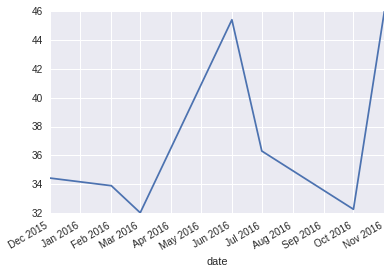

In [248]:
df_tmp["mean"].plot()

#### Pro v Con v Mixed?

The 2016 election was particularly divisive. Some of this can be seen by the number of pro vs con ads that were played in these 10 states during our observations.

We see that at least in this election cycle (over our subsample of data) that there were more negative ads that were played than positive. One might consider going back to 2008 or 2012 (or earlier) and seeing whether this was true back then as well. If not, then this is one measurable quantity of how this election cycle was more divided than previous ones.

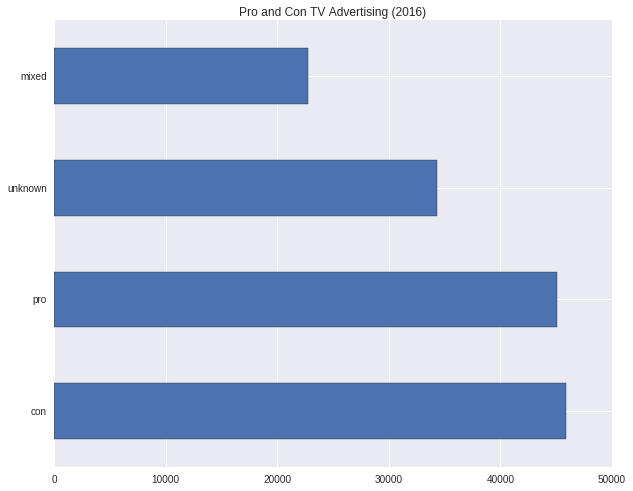

In [142]:
fig, ax = plt.subplots(figsize=(10, 8))

df["message"].value_counts().plot(kind="barh", ax=ax)

ax.set_title("Pro and Con TV Advertising (2016)")

#### Did Pro/Con Change Over Time?

One thing you might wonder is whether the pro/con ratio changed over time. We can investigate this by looking at the pro/con ratio by month over our sample

In [145]:
# We say an ad happened when the ad ended
df_tmp = df.set_index("end_time")

# Do the groupby
mym = ["month", "year", "message"]
df_tmp = df_tmp[mym].groupby(["month", "year"])["message"].value_counts()

# Unstack it, create a date column, set index to date
df_tmp = df_tmp.unstack().reset_index()
df_tmp = df_tmp.set_index("date")

# Compute the ratio
df_tmp.loc[:, "ratio"] = df_tmp["con"] / df_tmp["pro"]

df_tmp.loc[:, "total_obs_ads"] = df_tmp[["con", "mixed", "pro", "unknown"]].sum(axis=1)

# Only keep months with more than 500 ads
df_tmp = df_tmp[df_tmp["total_obs_ads"] > 500]

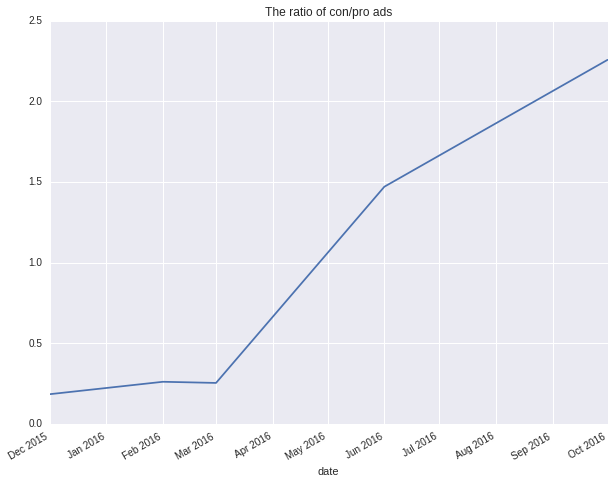

In [146]:
fig, ax = plt.subplots(figsize=(10, 8))

df_tmp["ratio"].plot(ax=ax)

ax.set_title("The ratio of con/pro ads");

In [60]:
df2 = df.groupby(["candidates", "message"])["type"].count()